<a href="https://colab.research.google.com/github/cristupac25/FINAL-PYTHON/blob/main/Regresion_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Al tratamiento de los datos
import numpy as np
import pandas as pd

# Visualizamiento de los datos
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# No presentar advertencia
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/Feminicidio/MODELADO.xlsx"

/content/drive/MyDrive/Feminicidio/MODELADO.xlsx


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Feminicidio/MODELADO.xlsx")
df.head()

,ITEM,ORIGEN,Año,Mes,DIA,HORA,Estación,Distrito_Fiscal,VIC_Edad,VIC_Edad1,AGRE_Edad,AGR_Edad_INTERVALO,SEXO_AGR,Ndenuncia,RFEM,D1_VIC_GradoEscolaridad,D1_VIC_SituacionLaboral,D2_AGR_GradoEscolaridad,D2_AGR_EstadoLaboral,D3_EdadesDif,|D3_EdadesDif|,D4_DenunciaPrevia,FEMINICIDIO
0,1,DATA OSIS,2009,FEBRERO,LUNES,TARDE (12:01 A 18:00 HORAS),VERANO,AREQUIPA,36,18-36 Años,32,23-39 Años,M,7,FEMINICIDIO,PRIMARIA,SI TRABAJA,SECUNDARIA,SI TRABAJA,-4,4,SI,SI
1,2,DATA OSIS,2009,OCTUBRE,MARTES,MAÑANA (06:01 A 12:00 HORAS),PRIMAVERA,AREQUIPA,30,18-36 Años,33,23-39 Años,M,7,NO FEMINICIDIO,PRIMARIA,SI TRABAJA,SECUNDARIA,SI TRABAJA,3,3,SI,NO
2,3,DATA OSIS,2009,JULIO,VIERNES,TARDE (12:01 A 18:00 HORAS),INVIERNO,AREQUIPA,34,18-36 Años,33,23-39 Años,M,7,NO FEMINICIDIO,SUPERIOR,SI TRABAJA,SECUNDARIA,SI TRABAJA,-1,1,SI,NO
3,4,DATA OSIS,2009,JULIO,VIERNES,TARDE (12:01 A 18:00 HORAS),INVIERNO,AREQUIPA,23,18-36 Años,26,23-39 Años,M,7,NO FEMINICIDIO,SECUNDARIA,NO TRABAJA,SECUNDARIA,SI TRABAJA,3,3,SI,NO
4,5,DATA OSIS,2009,JULIO,MARTES,MAÑANA (06:01 A 12:00 HORAS),INVIERNO,AREQUIPA,35,18-36 Años,53,39-55 Años,M,0,NO FEMINICIDIO,SECUNDARIA,NO TRABAJA,SECUNDARIA,SI TRABAJA,18,18,NO,NO


In [ ]:
df.shape

(11024, 23)

In [ ]:
df.describe()

,ITEM,Año,VIC_Edad,AGRE_Edad,Ndenuncia,D3_EdadesDif,|D3_EdadesDif|
count,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000
mean,5512.500000,2016.394684,29.958001,35.478592,32.974147,5.520591,10.417362
std,3182.499018,3.308885,12.554681,9.898464,76.814634,12.866199,9.353475
min,1.000000,2009.000000,0.000000,8.000000,0.000000,-73.000000,0.000000
25%,2756.750000,2014.000000,21.000000,28.000000,0.000000,-1.000000,3.000000
50%,5512.500000,2017.000000,29.000000,35.000000,0.000000,5.000000,8.000000
75%,8268.250000,2019.000000,37.000000,42.000000,26.000000,13.000000,15.000000
max,11024.000000,2022.000000,99.000000,86.000000,369.000000,81.000000,81.000000


In [ ]:
df.dtypes

ITEM                        int64
ORIGEN                     object
Año                         int64
Mes                        object
DIA                        object
HORA                       object
Estación                   object
Distrito_Fiscal            object
VIC_Edad                    int64
VIC_Edad1                  object
AGRE_Edad                   int64
AGR_Edad_INTERVALO         object
SEXO_AGR                   object
Ndenuncia                   int64
RFEM                       object
D1_VIC_GradoEscolaridad    object
D1_VIC_SituacionLaboral    object
D2_AGR_GradoEscolaridad    object
D2_AGR_EstadoLaboral       object
D3_EdadesDif                int64
|D3_EdadesDif|              int64
D4_DenunciaPrevia          object
FEMINICIDIO                object
dtype: object

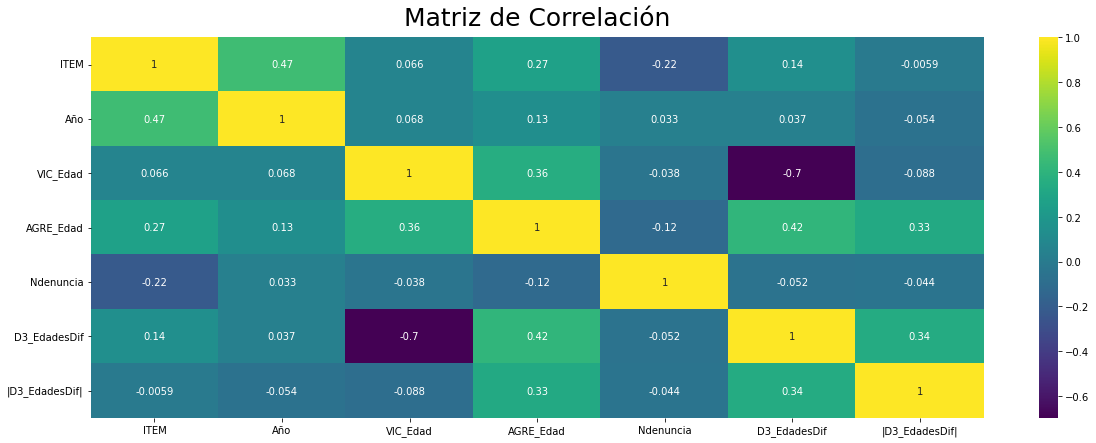

In [ ]:
plt.figure(figsize=(20, 7))
heatmap = sns.heatmap(df.corr(),cmap='viridis',annot=True)

heatmap.set_title('Matriz de Correlación', fontdict={'fontsize':25}, pad=12);

In [ ]:
df2 = df.drop(["ORIGEN", "Año", "Mes", "DIA", "HORA", "Estación","Distrito_Fiscal","VIC_Edad","VIC_Edad1","AGRE_Edad","AGR_Edad_INTERVALO",
               "SEXO_AGR","RFEM","|D3_EdadesDif|","Ndenuncia"], axis = 1)
df2

,ITEM,D1_VIC_GradoEscolaridad,D1_VIC_SituacionLaboral,D2_AGR_GradoEscolaridad,D2_AGR_EstadoLaboral,D3_EdadesDif,D4_DenunciaPrevia,FEMINICIDIO
0,1,PRIMARIA,SI TRABAJA,SECUNDARIA,SI TRABAJA,-4,SI,SI
1,2,PRIMARIA,SI TRABAJA,SECUNDARIA,SI TRABAJA,3,SI,NO
2,3,SUPERIOR,SI TRABAJA,SECUNDARIA,SI TRABAJA,-1,SI,NO
3,4,SECUNDARIA,NO TRABAJA,SECUNDARIA,SI TRABAJA,3,SI,NO
4,5,SECUNDARIA,NO TRABAJA,SECUNDARIA,SI TRABAJA,18,NO,NO
...,...,...,...,...,...,...,...,...
11019,11020,SECUNDARIA,SI TRABAJA,SECUNDARIA,NO TRABAJA,9,NO,SI
11020,11021,SECUNDARIA,SI TRABAJA,SECUNDARIA,NO TRABAJA,9,NO,SI
11021,11022,SECUNDARIA,SI TRABAJA,SECUNDARIA,NO TRABAJA,9,NO,SI
11022,11023,SECUNDARIA,SI TRABAJA,SECUNDARIA,NO TRABAJA,9,NO,SI


**ONE HOT ENCODING**

Dicotomicas

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_cat = ["D1_VIC_SituacionLaboral","D2_AGR_EstadoLaboral","D4_DenunciaPrevia","FEMINICIDIO"]

for column in var_cat:
    df_le = LabelEncoder()
    df2[column] = df_le.fit_transform(np.ravel(df2[[column]]))
df2

,ITEM,D1_VIC_GradoEscolaridad,D1_VIC_SituacionLaboral,D2_AGR_GradoEscolaridad,D2_AGR_EstadoLaboral,D3_EdadesDif,D4_DenunciaPrevia,FEMINICIDIO
0,1,PRIMARIA,1,SECUNDARIA,1,-4,1,1
1,2,PRIMARIA,1,SECUNDARIA,1,3,1,0
2,3,SUPERIOR,1,SECUNDARIA,1,-1,1,0
3,4,SECUNDARIA,0,SECUNDARIA,1,3,1,0
4,5,SECUNDARIA,0,SECUNDARIA,1,18,0,0
...,...,...,...,...,...,...,...,...
11019,11020,SECUNDARIA,1,SECUNDARIA,0,9,0,1
11020,11021,SECUNDARIA,1,SECUNDARIA,0,9,0,1
11021,11022,SECUNDARIA,1,SECUNDARIA,0,9,0,1
11022,11023,SECUNDARIA,1,SECUNDARIA,0,9,0,1


Categoricas

In [ ]:
data_categorica = df2.select_dtypes(include=["object"])
categorica = list(data_categorica.columns)
categorica

['D1_VIC_GradoEscolaridad', 'D2_AGR_GradoEscolaridad']

In [ ]:
data_numerica = df2.select_dtypes(include=["int", "float"])
numerica = list(data_numerica.columns)
numerica

['ITEM',
 'D1_VIC_SituacionLaboral',
 'D2_AGR_EstadoLaboral',
 'D3_EdadesDif',
 'D4_DenunciaPrevia',
 'FEMINICIDIO']

In [ ]:
df2["D1_VIC_GradoEscolaridad"].unique()

array(['PRIMARIA', 'SUPERIOR', 'SECUNDARIA',
       'ILETRADO Y/O SIN INSTRUCCIÓN'], dtype=object)

In [ ]:
cat_ingredients=pd.get_dummies(df2["D1_VIC_GradoEscolaridad"], drop_first=False)
cat_ingredients.head()

,ILETRADO Y/O SIN INSTRUCCIÓN,PRIMARIA,SECUNDARIA,SUPERIOR
0,0,1,0,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


In [ ]:
#Conviertiendo todas las variables categoricas en numéricas
categoria_numeric=pd.get_dummies(data_categorica, drop_first=False)
categoria_numeric

,D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D1_VIC_GradoEscolaridad_PRIMARIA,D1_VIC_GradoEscolaridad_SECUNDARIA,D1_VIC_GradoEscolaridad_SUPERIOR,D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D2_AGR_GradoEscolaridad_PRIMARIA,D2_AGR_GradoEscolaridad_SECUNDARIA,D2_AGR_GradoEscolaridad_SUPERIOR
0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
11019,0,0,1,0,0,0,1,0
11020,0,0,1,0,0,0,1,0
11021,0,0,1,0,0,0,1,0
11022,0,0,1,0,0,0,1,0


In [ ]:
datos=pd.concat([categoria_numeric,data_numerica], axis=1)
datos

,D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D1_VIC_GradoEscolaridad_PRIMARIA,D1_VIC_GradoEscolaridad_SECUNDARIA,D1_VIC_GradoEscolaridad_SUPERIOR,D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D2_AGR_GradoEscolaridad_PRIMARIA,D2_AGR_GradoEscolaridad_SECUNDARIA,D2_AGR_GradoEscolaridad_SUPERIOR,ITEM,D1_VIC_SituacionLaboral,D2_AGR_EstadoLaboral,D3_EdadesDif,D4_DenunciaPrevia,FEMINICIDIO
0,0,1,0,0,0,0,1,0,1,1,1,-4,1,1
1,0,1,0,0,0,0,1,0,2,1,1,3,1,0
2,0,0,0,1,0,0,1,0,3,1,1,-1,1,0
3,0,0,1,0,0,0,1,0,4,0,1,3,1,0
4,0,0,1,0,0,0,1,0,5,0,1,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,0,0,1,0,0,0,1,0,11020,1,0,9,0,1
11020,0,0,1,0,0,0,1,0,11021,1,0,9,0,1
11021,0,0,1,0,0,0,1,0,11022,1,0,9,0,1
11022,0,0,1,0,0,0,1,0,11023,1,0,9,0,1


In [ ]:
datos.to_excel('COEFICIENTES.xlsx', sheet_name='data', index=False)

In [ ]:
datos = datos.drop(["ITEM"], axis = 1)
datos

,D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D1_VIC_GradoEscolaridad_PRIMARIA,D1_VIC_GradoEscolaridad_SECUNDARIA,D1_VIC_GradoEscolaridad_SUPERIOR,D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D2_AGR_GradoEscolaridad_PRIMARIA,D2_AGR_GradoEscolaridad_SECUNDARIA,D2_AGR_GradoEscolaridad_SUPERIOR,D1_VIC_SituacionLaboral,D2_AGR_EstadoLaboral,D3_EdadesDif,D4_DenunciaPrevia,FEMINICIDIO
0,0,1,0,0,0,0,1,0,1,1,-4,1,1
1,0,1,0,0,0,0,1,0,1,1,3,1,0
2,0,0,0,1,0,0,1,0,1,1,-1,1,0
3,0,0,1,0,0,0,1,0,0,1,3,1,0
4,0,0,1,0,0,0,1,0,0,1,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,0,0,1,0,0,0,1,0,1,0,9,0,1
11020,0,0,1,0,0,0,1,0,1,0,9,0,1
11021,0,0,1,0,0,0,1,0,1,0,9,0,1
11022,0,0,1,0,0,0,1,0,1,0,9,0,1


In [ ]:
import statsmodels.api as sm

In [ ]:
datos = sm.add_constant(datos, prepend=True)

In [ ]:
datos

,const,D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D1_VIC_GradoEscolaridad_PRIMARIA,D1_VIC_GradoEscolaridad_SECUNDARIA,D1_VIC_GradoEscolaridad_SUPERIOR,D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D2_AGR_GradoEscolaridad_PRIMARIA,D2_AGR_GradoEscolaridad_SECUNDARIA,D2_AGR_GradoEscolaridad_SUPERIOR,D1_VIC_SituacionLaboral,D2_AGR_EstadoLaboral,D3_EdadesDif,D4_DenunciaPrevia,FEMINICIDIO
0,1.0,0,1,0,0,0,0,1,0,1,1,-4,1,1
1,1.0,0,1,0,0,0,0,1,0,1,1,3,1,0
2,1.0,0,0,0,1,0,0,1,0,1,1,-1,1,0
3,1.0,0,0,1,0,0,0,1,0,0,1,3,1,0
4,1.0,0,0,1,0,0,0,1,0,0,1,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,1.0,0,0,1,0,0,0,1,0,1,0,9,0,1
11020,1.0,0,0,1,0,0,0,1,0,1,0,9,0,1
11021,1.0,0,0,1,0,0,0,1,0,1,0,9,0,1
11022,1.0,0,0,1,0,0,0,1,0,1,0,9,0,1


In [ ]:
df2.shape

(11024, 8)

In [ ]:
#Ahora podemos ver que la cantidad de variables ha aumentado
datos.shape

(11024, 14)

In [ ]:
y=datos["FEMINICIDIO"]
x=datos.drop("FEMINICIDIO",axis=1)

In [ ]:
x.head()

,const,D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D1_VIC_GradoEscolaridad_PRIMARIA,D1_VIC_GradoEscolaridad_SECUNDARIA,D1_VIC_GradoEscolaridad_SUPERIOR,D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D2_AGR_GradoEscolaridad_PRIMARIA,D2_AGR_GradoEscolaridad_SECUNDARIA,D2_AGR_GradoEscolaridad_SUPERIOR,D1_VIC_SituacionLaboral,D2_AGR_EstadoLaboral,D3_EdadesDif,D4_DenunciaPrevia
0,1.0,0,1,0,0,0,0,1,0,1,1,-4,1
1,1.0,0,1,0,0,0,0,1,0,1,1,3,1
2,1.0,0,0,0,1,0,0,1,0,1,1,-1,1
3,1.0,0,0,1,0,0,0,1,0,0,1,3,1
4,1.0,0,0,1,0,0,0,1,0,0,1,18,0


In [ ]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: FEMINICIDIO, dtype: int64

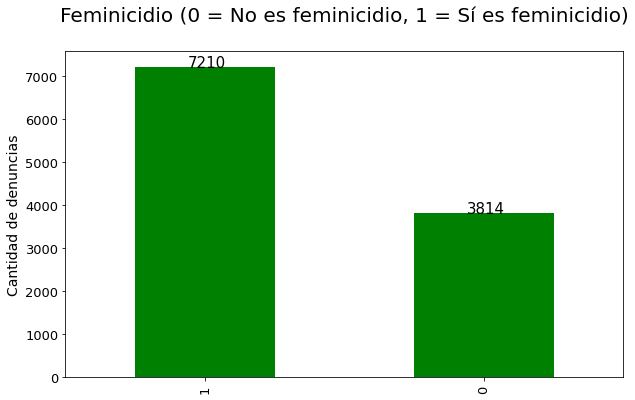

In [ ]:
ax = datos["FEMINICIDIO"].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color="g")
ax.set_title("Feminicidio (0 = No es feminicidio, 1 = Sí es feminicidio)", size=20, pad=30)
ax.set_ylabel('Cantidad de denuncias', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 5, str(round(i.get_height(), 2)), fontsize=15)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

print(f'''% Positive class in Train = {np.round(y_train.value_counts(normalize=True)[0] * 100, 2)}
% Positive class in Test  = {np.round(y_test.value_counts(normalize=True)[0] * 100, 2)}''')

% Positive class in Train = 34.4
% Positive class in Test  = 35.37


In [ ]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
#from numpy import value_counts

sm = SMOTE(random_state=123)

x_sm, y_sm =sm.fit_resample(x,y)

In [ ]:
print(f'''Cambio de x antes de SMOTE: {x.shape}
Cambio de x después SMOTE: {x_sm.shape}''')

In [ ]:
sns.countplot(y_sm);
plt.title("Datos Balanceados");

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

8819
2205
8819
2205


In [ ]:
x_test

,const,D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D1_VIC_GradoEscolaridad_PRIMARIA,D1_VIC_GradoEscolaridad_SECUNDARIA,D1_VIC_GradoEscolaridad_SUPERIOR,D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN,D2_AGR_GradoEscolaridad_PRIMARIA,D2_AGR_GradoEscolaridad_SECUNDARIA,D2_AGR_GradoEscolaridad_SUPERIOR,D1_VIC_SituacionLaboral,D2_AGR_EstadoLaboral,D3_EdadesDif,D4_DenunciaPrevia
6975,1.0,0,0,1,0,0,1,0,0,0,1,11,0
914,1.0,0,1,0,0,0,1,0,0,0,1,13,1
4397,1.0,0,0,1,0,0,0,1,0,0,1,-2,1
7859,1.0,0,0,1,0,0,0,1,0,1,0,6,0
9761,1.0,0,0,1,0,0,0,1,0,1,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,1.0,0,0,0,1,0,0,1,0,1,1,29,1
1020,1.0,0,1,0,0,0,0,1,0,0,1,15,1
705,1.0,0,0,0,1,0,0,0,1,0,1,7,1
3527,1.0,1,0,0,0,0,1,0,0,0,1,-49,1


In [ ]:
y_test

6975    1
914     0
4397    0
7859    1
9761    1
       ..
2751    0
1020    1
705     1
3527    0
1866    0
Name: FEMINICIDIO, Length: 2205, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_sm_train,x_sm_test,y_sm_train,y_sm_test=train_test_split(x_sm,y_sm,random_state=42,test_size=0.2)

In [ ]:
print(len(x_sm_train))
print(len(x_sm_test))
print(len(y_sm_train))
print(len(y_sm_test))

**Modelado de Regresión Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Llamamos al objeto
reg = LogisticRegression()

# Entrenamos al modelos
reg.fit(x_train,y_train)                         

# Haciendo predicciones
y_pred_reg=reg.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

acc_reg = accuracy_score(y_test, y_pred_reg)
print("Clasificación de Reporte:\n",classification_report(y_test,y_pred_reg))

Clasificación de Reporte:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       780
           1       0.96      0.83      0.89      1425

    accuracy                           0.86      2205
   macro avg       0.85      0.88      0.86      2205
weighted avg       0.88      0.86      0.87      2205



In [ ]:
acc_reg = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy Score de la Regresión logística : {acc_reg}")

Accuracy Score de la Regresión logística : 0.8639455782312925


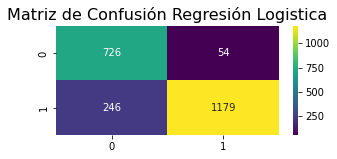

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Regresión Logistica", fontsize=16)
sns.heatmap(confusion_matrix(y_test,y_pred_reg), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

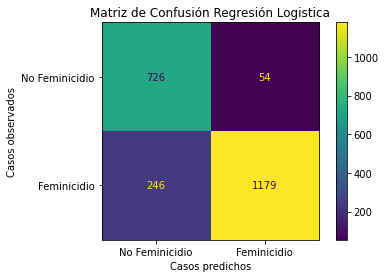

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_reg)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Feminicidio", "Feminicidio"])

cm_display.plot()

cm_display.ax_.set(title="Matriz de Confusión Regresión Logistica", xlabel="Casos predichos", ylabel="Casos observados")

plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
#log_clf = LogisticRegression()
log_clf_sm =sm.Logit(y_train,x_train)
classifier_sm = log_clf_sm.fit(method='bfgs')

y_pred_sm = classifier_sm.predict(x_test)

print(classifier_sm.summary2())

In [ ]:
logit_reg = sm.GLM(y_train, x_train, family=sm.families.Binomial())
logit_result = logit_reg.fit()
logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            FEMINICIDIO   No. Observations:                 8819
Model:                            GLM   Df Residuals:                     8808
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2787.1
Date:                Fri, 02 Dec 2022   Deviance:                       5574.2
Time:                        17:12:14   Pearson chi2:                 6.93e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.6729      0.104     25.737      0.000       2.469       2.876
D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN     1.2831      0.162      7.918      0.000       0.965       1.601
D1_VIC_GradoEscolaridad_PRIMARIA                         0.4158      0.083      5.022      0.000       0.254       0.578
D1_VIC_GradoEscolaridad_SECUNDARIA                       0.8968      0.069     13.068      0.000       0.762       1.031
D1_VIC_GradoEscolaridad_SUPERIOR                         0.0773      0.111      0.695      0.487      -0.141       0.295
D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN     1.1655      0.279      4.170      0.000       0.618       1.713
D2_AGR_GradoEscolaridad_PRIMARIA                         0.6193      0.117      5.278      0.000       0.389       0.849
D2_AGR_GradoEscolaridad_SECUNDARIA                       0.1876      0.091      2.060      0.039       0.009       0.366
D2_AGR_GradoEscolaridad_SUPERIOR                         0.7005      0.136      5.132      0.000       0.433       0.968
D1_VIC_SituacionLaboral                                  0.4375      0.072      6.061      0.000       0.296       0.579
D2_AGR_EstadoLaboral                                    -0.9226      0.094     -9.816      0.000      -1.107      -0.738
D3_EdadesDif                                             0.0076      0.002      3.131      0.002       0.003       0.012
D4_DenunciaPrevia                                       -4.0630      0.100    -40.831      0.000      -4.258      -3.868
========================================================================================================================
"""

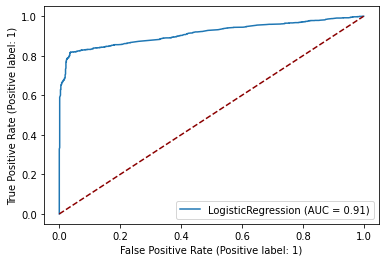

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(reg , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()

In [ ]:
np.set_printoptions(suppress=True)
print(reg.predict(x_test))
print(reg.predict_proba(x_test))
print(reg.score(x_test, y_test))

[1 0 0 ... 0 0 0]
[[0.03397523 0.96602477]
 [0.76287476 0.23712524]
 [0.77555807 0.22444193]
 ...
 [0.81700134 0.18299866]
 [0.68210012 0.31789988]
 [0.68784032 0.31215968]]
0.8639455782312925


**Modelado del Árbol de decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Llamamo al objeto clasificador
dtree = DecisionTreeClassifier(max_depth=1, random_state=42,criterion='entropy')

# Entrenamos el modelo
dtree.fit(x_train,y_train)

# Hacemos predicciones
y_pred_dt=dtree.predict(x_test)

In [ ]:
x_train.columns

Index(['const', 'D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN',
       'D1_VIC_GradoEscolaridad_PRIMARIA',
       'D1_VIC_GradoEscolaridad_SECUNDARIA',
       'D1_VIC_GradoEscolaridad_SUPERIOR',
       'D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN',
       'D2_AGR_GradoEscolaridad_PRIMARIA',
       'D2_AGR_GradoEscolaridad_SECUNDARIA',
       'D2_AGR_GradoEscolaridad_SUPERIOR', 'D1_VIC_SituacionLaboral',
       'D2_AGR_EstadoLaboral', 'D3_EdadesDif', 'D4_DenunciaPrevia'],
      dtype='object')

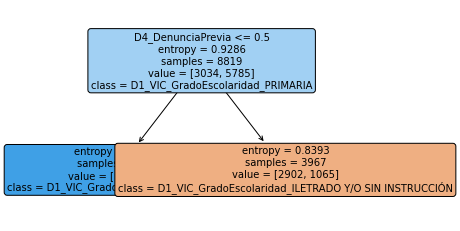

In [ ]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dtree, feature_names = x_train.columns,class_names =[
        'D1_VIC_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN',
        'D1_VIC_GradoEscolaridad_PRIMARIA',
       'D1_VIC_GradoEscolaridad_SECUNDARIA',
       'D1_VIC_GradoEscolaridad_SUPERIOR',
       'D2_AGR_GradoEscolaridad_ILETRADO Y/O SIN INSTRUCCIÓN',
       'D2_AGR_GradoEscolaridad_PRIMARIA',
       'D2_AGR_GradoEscolaridad_SECUNDARIA',
       'D2_AGR_GradoEscolaridad_SUPERIOR', 'D1_VIC_SituacionLaboral',
       'D2_AGR_EstadoLaboral', 'D3_EdadesDif', 'D4_DenunciaPrevia'], filled = True , precision = 4, rounded = True, fontsize = 10)

In [ ]:
clf =print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       780
           1       0.97      0.82      0.89      1425

    accuracy                           0.87      2205
   macro avg       0.86      0.89      0.86      2205
weighted avg       0.89      0.87      0.87      2205



In [ ]:
acc_dt=accuracy_score(y_test,y_pred_dt)
print(f"Accuracy Score de Árbol de decisión es : {acc_dt}")

Accuracy Score de Árbol de decisión es : 0.8693877551020408


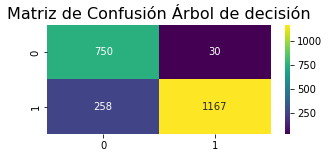

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (5,2))
plt.title("Matriz de Confusión Árbol de decisión", fontsize=16)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot = True, cmap = 'viridis',fmt = '.0f')
    
plt.show();

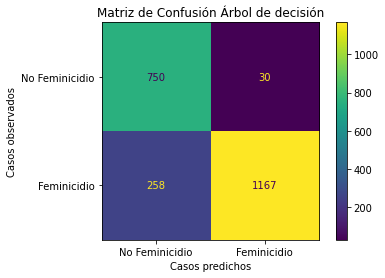

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["No Feminicidio", "Feminicidio"])

cm_display.plot()

cm_display.ax_.set(title="Matriz de Confusión Árbol de decisión", xlabel="Casos predichos", ylabel="Casos observados")

plt.show()

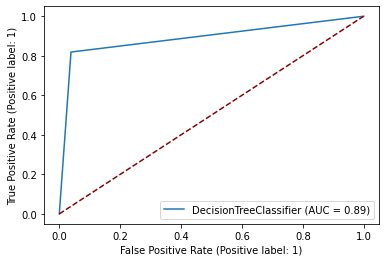

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtree , x_test, y_test )
plt.plot([0,1],[0,1],color='darkred',linestyle='--')
plt.show()